In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv('Power_Data.csv')
df.head()

,Material,Customer,Movement type,Posting Date,MBG Quantity,SM3 Quantity,Qty (MMSCMD),Customer Name,Customer Location
0,GMS_GGS1_4,10333.0,601.0,1-Apr-20,"-25,343.609","-679,414.000",0.679,NTPC LTD,BHARUCH_N.T.P.C LIMITED(10333 NGSGU
1,GMS_GGS1_4,10333.0,601.0,1-Apr-20,"-4,827.422","-129,414.000",0.129,NTPC LTD,BHARUCH_N.T.P.C LIMITED(10333 NGSGU
2,GMS_GGS1_4,10333.0,602.0,1-Apr-20,"4,827.422","129,414.000",0.129,NTPC LTD,BHARUCH_N.T.P.C LIMITED(10333 NGSGU
3,GMS_NCG,10333.0,601.0,1-Apr-20,-448.409,"-12,021.000",0.012,NTPC LTD,BHARUCH_N.T.P.C LIMITED(10333 NGSGU
4,GMS_NCG,10333.0,601.0,1-Apr-20,-448.409,"-12,021.000",0.012,NTPC LTD,BHARUCH_N.T.P.C LIMITED(10333 NGSGU


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35392 entries, 0 to 35391
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Material           35391 non-null  object 
 1   Customer           35391 non-null  float64
 2   Movement type      35391 non-null  float64
 3   Posting Date       35391 non-null  object 
 4   MBG Quantity       35391 non-null  object 
 5   SM3 Quantity       35391 non-null  object 
 6   Qty (MMSCMD)       35391 non-null  float64
 7   Customer Name      35391 non-null  object 
 8   Customer Location  35391 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.4+ MB


In [134]:
df_copy = df.copy()
df.drop(['Material', 'Movement type', 'MBG Quantity', 'SM3 Quantity','Customer Name'], axis=1, inplace=True)

In [135]:
df_copy.columns

Index(['Material', 'Customer', 'Movement type', 'Posting Date', 'MBG Quantity',
       'SM3 Quantity', 'Qty (MMSCMD)', 'Customer Name', 'Customer Location'],
      dtype='object')

In [136]:
id_mapping = df_copy.groupby('Customer').apply(lambda x: x[['Customer Name', 'Customer Location']].to_dict('records')).to_dict()

C:\Users\Krishna\AppData\Local\Temp\ipykernel_17500\3030484697.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  id_mapping = df_copy.groupby('Customer').apply(lambda x: x[['Customer Name', 'Customer Location']].to_dict('records')).to_dict()


In [137]:
def search_id(id_to_search, id_mapping):
    def pause():
        input("Press Enter to continue...")

    if id_to_search in id_mapping:
        results = id_mapping[id_to_search]
        if len(results) == 1:
            print("One entry found:\n")
            print(f"ID: {id_to_search}:\t Name: {results[0]['Customer Name']}\t Address: {results[0]['Customer Location']}")
            pause()
        elif len(results) > 1:
            print(f"Multiple entries found for ID {id_to_search}:")
            for idx, entry in enumerate(results, 1):
                print(f"{idx}. Name: {entry['Customer Name']}\t Address: {entry['Customer Location']}")
            print()  # Add a blank line for better readability
            
            while True:
                choice = input("Enter the number of the entry you want to see in detail, 'all' to see all, or 'q' to quit: ")
                if choice.lower() == 'q':
                    break
                elif choice.lower() == 'all':
                    for idx, entry in enumerate(results, 1):
                        print(f"\nEntry {idx}:")
                        print(f"Name: {entry['Customer Name']}")
                        print(f"Address: {entry['Customer Location']}")
                        print("Other details:", {k: v for k, v in entry.items() if k not in ['Customer Name', 'Customer Location']})
                        pause()
                elif choice.isdigit() and 1 <= int(choice) <= len(results):
                    entry = results[int(choice) - 1]
                    print(f"\nName: {entry['Customer Name']}")
                    print(f"Address: {entry['Customer Location']}")
                    print("Other details:", {k: v for k, v in entry.items() if k not in ['Customer Name', 'Customer Location']})
                    pause()
                else:
                    print("Invalid choice. Please try again.")
                print()  # Add a blank line for better readability
        else:
            print('No entries found')
    else:
        print('ID not found in the mapping')

# Example usage
# search_id(10333, id_mapping)

In [138]:
df = df.dropna(subset=['Posting Date'])

In [139]:
#convert date time in the standard dd/mm/yyyy format
from datetime import datetime
def date_standardizer(date):
    if pd.isna(date) or str(date).lower() == 'nan':
        return None  # or 'Invalid Date', depending on your preference
    try:
        date_object = datetime.strptime(str(date), "%d-%b-%y")
        return date_object.strftime("%d/%m/%Y")
    except ValueError:
        # If the date doesn't match the expected format, return None or a specific string
        return None  # or 'Invalid Date Format'
    
df['Standardized Date'] = df['Posting Date'].apply(date_standardizer)
df.head()

,Customer,Posting Date,Qty (MMSCMD),Customer Location,Standardized Date
0,10333.0,1-Apr-20,0.679,BHARUCH_N.T.P.C LIMITED(10333 NGSGU,01/04/2020
1,10333.0,1-Apr-20,0.129,BHARUCH_N.T.P.C LIMITED(10333 NGSGU,01/04/2020
2,10333.0,1-Apr-20,0.129,BHARUCH_N.T.P.C LIMITED(10333 NGSGU,01/04/2020
3,10333.0,1-Apr-20,0.012,BHARUCH_N.T.P.C LIMITED(10333 NGSGU,01/04/2020
4,10333.0,1-Apr-20,0.012,BHARUCH_N.T.P.C LIMITED(10333 NGSGU,01/04/2020


In [140]:
df.drop(['Posting Date'], axis=1, inplace=True)

In [141]:
aggregated_df = df.groupby('Standardized Date')['Qty (MMSCMD)'].sum().reset_index()
aggregated_df = aggregated_df.sort_values('Standardized Date')
aggregated_df.head()

,Standardized Date,Qty (MMSCMD)
0,01/01/2021,6.244
1,01/01/2022,7.650
2,01/01/2023,7.606
3,01/01/2024,4.365
4,01/02/2021,6.949


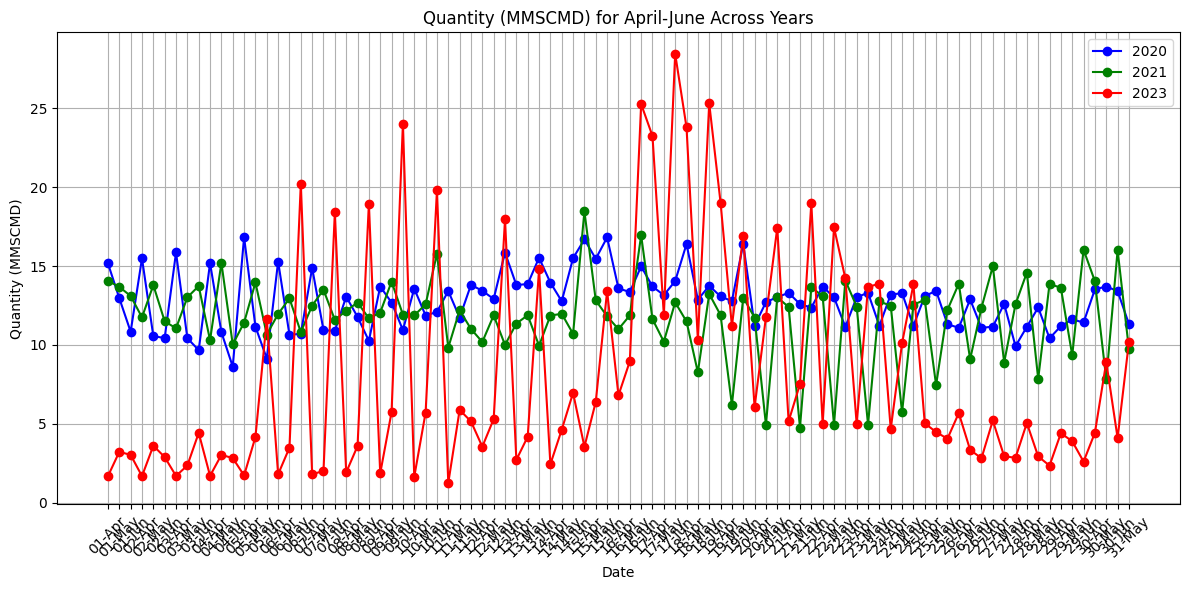

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming we're working with the aggregated DataFrame from the previous step
# If not, you'll need to aggregate the data first

# Convert 'Standardized Date' to datetime with the correct format
aggregated_df['Standardized Date'] = pd.to_datetime(aggregated_df['Standardized Date'], format='%d/%m/%Y')

# Function to filter data for April-June of a specific year
def get_april_june_data(df, year):
    start_date = f'{year}-04-01'
    end_date = f'{year}-06-30'
    return df[(df['Standardized Date'] >= start_date) & (df['Standardized Date'] <= end_date)]

# Get data for each year
data_2020 = get_april_june_data(aggregated_df, 2020)
data_2021 = get_april_june_data(aggregated_df, 2021)
data_2023 = get_april_june_data(aggregated_df, 2023)
data_2024 = get_april_june_data(aggregated_df, 2024)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot data for each year
years = [2020, 2021, 2023, 2024]
colors = ['blue', 'green', 'red', 'purple']

for year, color in zip(years, colors):
    data = locals()[f'data_{year}']
    if not data.empty:
        plt.plot(data['Standardized Date'].dt.strftime('%d-%b'), data['Qty (MMSCMD)'], 
                 label=str(year), color=color, marker='o')

plt.title('Quantity (MMSCMD) for April-June Across Years')
plt.xlabel('Date')
plt.ylabel('Quantity (MMSCMD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Adjust layout to prevent cut-off labels
plt.tight_layout()

# Show the plot
plt.show()

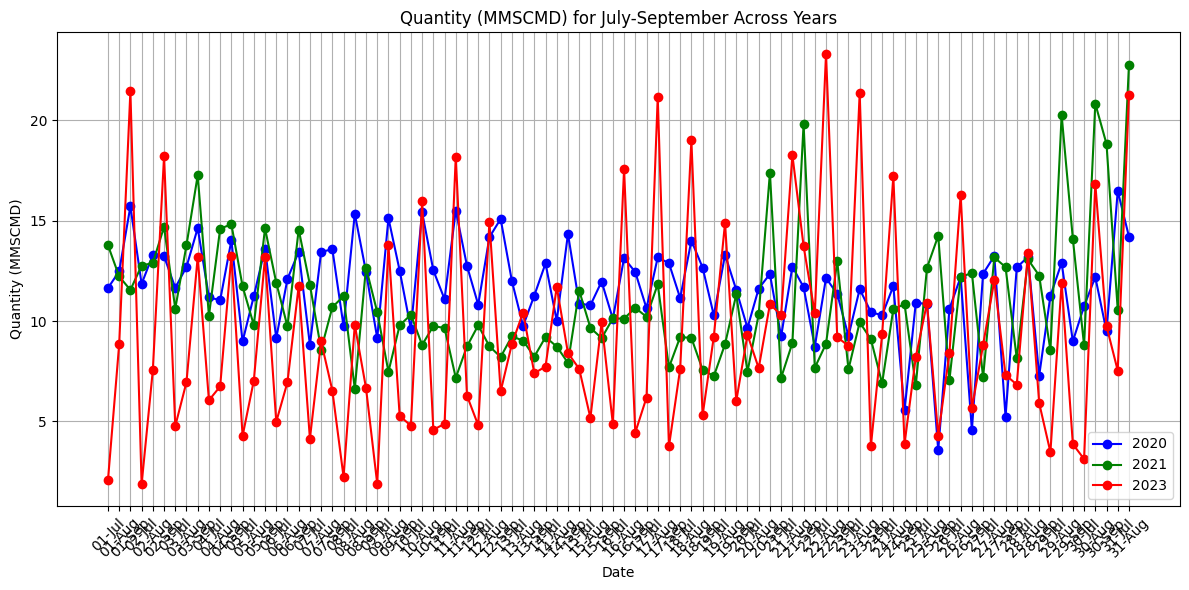

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming we're working with the aggregated DataFrame from the previous step
# If not, you'll need to aggregate the data first

# Convert 'Standardized Date' to datetime with the correct format
aggregated_df['Standardized Date'] = pd.to_datetime(aggregated_df['Standardized Date'], format='%d/%m/%Y')

# Function to filter data for April-June of a specific year
def get_july_sept_data(df, year):
    start_date = f'{year}-07-01'
    end_date = f'{year}-09-30'
    return df[(df['Standardized Date'] >= start_date) & (df['Standardized Date'] <= end_date)]

# Get data for each year
data_2021 = get_july_sept_data(aggregated_df, 2021)
data_2020 = get_july_sept_data(aggregated_df, 2020)
data_2023 = get_july_sept_data(aggregated_df, 2023)
data_2024 = get_july_sept_data(aggregated_df, 2024)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot data for each year
years = [2020, 2021, 2023, 2024]
colors = ['blue', 'green', 'red', 'purple']

for year, color in zip(years, colors):
    data = locals()[f'data_{year}']
    if not data.empty:
        plt.plot(data['Standardized Date'].dt.strftime('%d-%b'), data['Qty (MMSCMD)'], 
                 label=str(year), color=color, marker='o')

plt.title('Quantity (MMSCMD) for July-September Across Years')
plt.xlabel('Date')
plt.ylabel('Quantity (MMSCMD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Adjust layout to prevent cut-off labels
plt.tight_layout()

# Show the plot
plt.show()

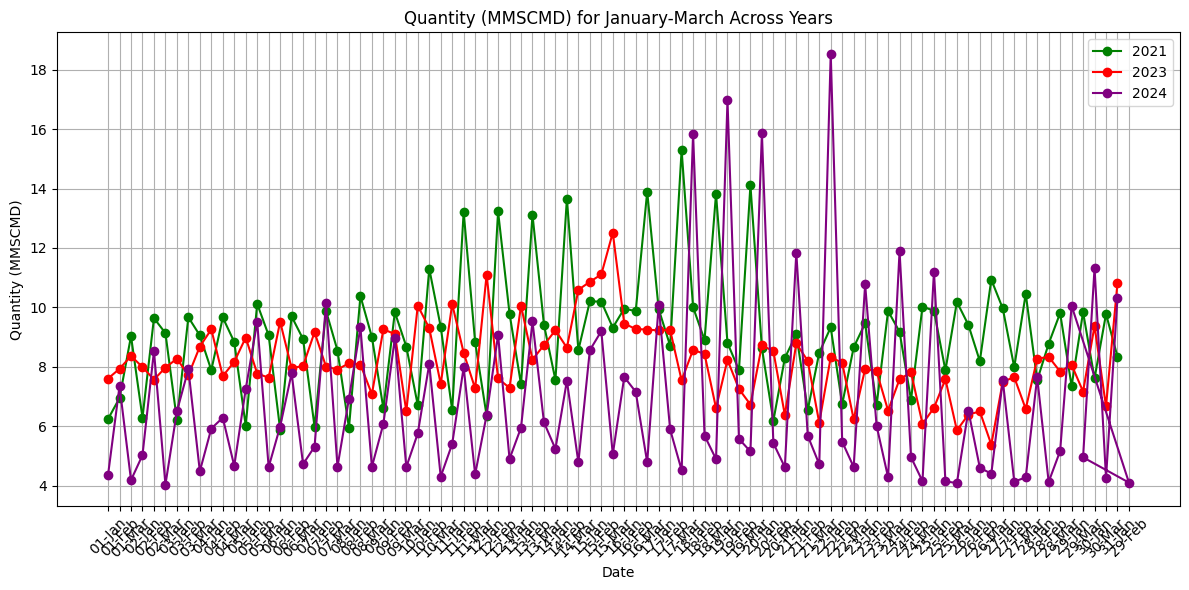

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming we're working with the aggregated DataFrame from the previous step
# If not, you'll need to aggregate the data first

# Convert 'Standardized Date' to datetime with the correct format
aggregated_df['Standardized Date'] = pd.to_datetime(aggregated_df['Standardized Date'], format='%d/%m/%Y')

# Function to filter data for April-June of a specific year
def get_jan_march_data(df, year):
    start_date = f'{year}-01-01'
    end_date = f'{year}-03-30'
    return df[(df['Standardized Date'] >= start_date) & (df['Standardized Date'] <= end_date)]

# Get data for each year
data_2020 = get_jan_march_data(aggregated_df, 2020)
data_2021 = get_jan_march_data(aggregated_df, 2021)
data_2023 = get_jan_march_data(aggregated_df, 2023)
data_2024 = get_jan_march_data(aggregated_df, 2024)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot data for each year
years = [2020, 2021, 2023, 2024]
colors = ['blue', 'green', 'red', 'purple']

for year, color in zip(years, colors):
    data = locals()[f'data_{year}']
    if not data.empty:
        plt.plot(data['Standardized Date'].dt.strftime('%d-%b'), data['Qty (MMSCMD)'], 
                 label=str(year), color=color, marker='o')

plt.title('Quantity (MMSCMD) for January-March Across Years')
plt.xlabel('Date')
plt.ylabel('Quantity (MMSCMD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Adjust layout to prevent cut-off labels
plt.tight_layout()

# Show the plot
plt.show()

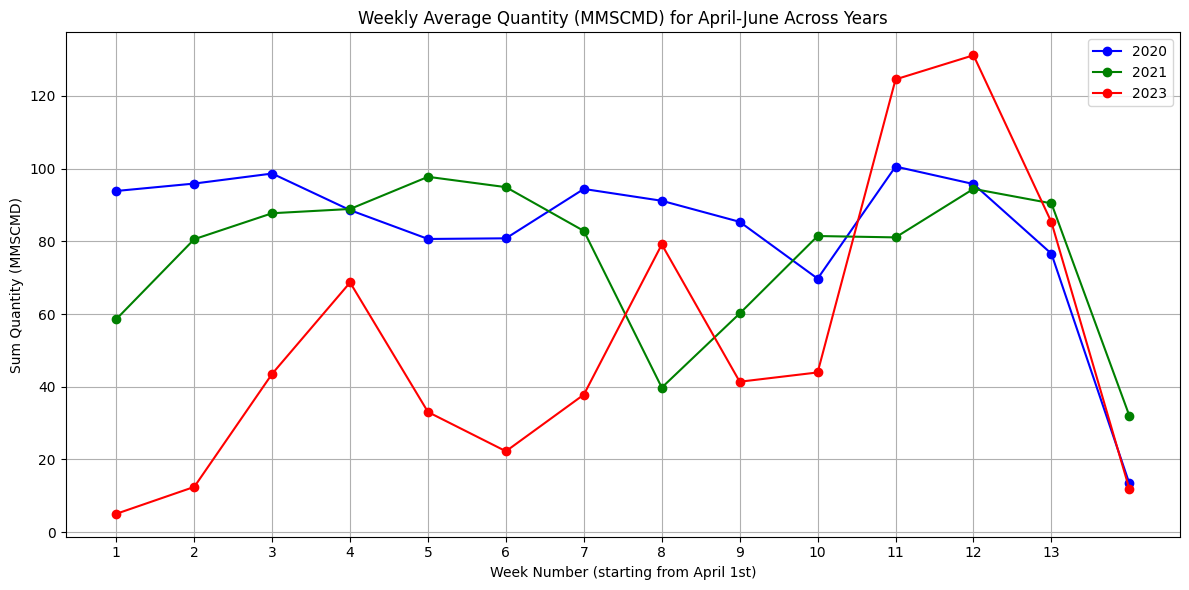

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convert 'Standardized Date' to datetime if it's not already
aggregated_df['Standardized Date'] = pd.to_datetime(aggregated_df['Standardized Date'])

# Function to filter and resample data for April-June of a specific year
def get_april_june_data_weekly(df, year):
    start_date = f'{year}-04-01'
    end_date = f'{year}-06-30'
    filtered_df = df[(df['Standardized Date'] >= start_date) & (df['Standardized Date'] <= end_date)]
    
    # Resample to weekly frequency and calculate mean
    weekly_df = filtered_df.resample('W-MON', on='Standardized Date')['Qty (MMSCMD)'].sum().reset_index()
    
    # Calculate week number starting from April 1st
    weekly_df['Week'] = (weekly_df['Standardized Date'] - pd.Timestamp(start_date)).dt.days // 7 + 1
    
    return weekly_df

# Get weekly data for each year
data_2020 = get_april_june_data_weekly(aggregated_df, 2020)
data_2021 = get_april_june_data_weekly(aggregated_df, 2021)
data_2023 = get_april_june_data_weekly(aggregated_df, 2023)
data_2024 = get_april_june_data_weekly(aggregated_df, 2024)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot data for each year
years = [2020, 2021, 2023, 2024]
colors = ['blue', 'green', 'red', 'purple']

for year, color in zip(years, colors):
    data = locals()[f'data_{year}']
    if not data.empty:
        plt.plot(data['Week'], data['Qty (MMSCMD)'], 
                 label=str(year), color=color, marker='o')

plt.title('Weekly Average Quantity (MMSCMD) for April-June Across Years')
plt.xlabel('Week Number (starting from April 1st)')
plt.ylabel('Sum Quantity (MMSCMD)')
plt.legend()
plt.grid(True)

# Set x-axis ticks to show all weeks
plt.xticks(range(1, 14))  # 13 weeks in a 3-month period

# Adjust layout to prevent cut-off labels
plt.tight_layout()

# Show the plot
plt.show()

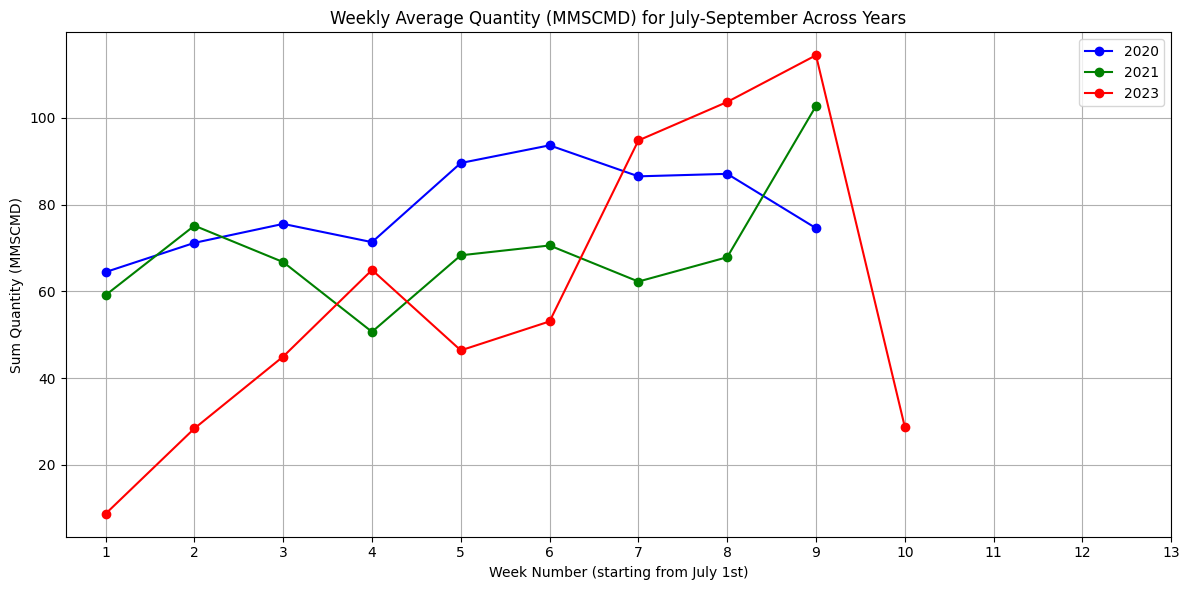

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convert 'Standardized Date' to datetime if it's not already
aggregated_df['Standardized Date'] = pd.to_datetime(aggregated_df['Standardized Date'])

# Function to filter and resample data for April-June of a specific year
def get_april_june_data_weekly(df, year):
    start_date = f'{year}-07-01'
    end_date = f'{year}-08-30'
    filtered_df = df[(df['Standardized Date'] >= start_date) & (df['Standardized Date'] <= end_date)]
    
    # Resample to weekly frequency and calculate mean
    weekly_df = filtered_df.resample('W-MON', on='Standardized Date')['Qty (MMSCMD)'].sum().reset_index()
    
    # Calculate week number starting from April 1st
    weekly_df['Week'] = (weekly_df['Standardized Date'] - pd.Timestamp(start_date)).dt.days // 7 + 1
    
    return weekly_df

# Get weekly data for each year
data_2020 = get_april_june_data_weekly(aggregated_df, 2020)
data_2021 = get_april_june_data_weekly(aggregated_df, 2021)
data_2023 = get_april_june_data_weekly(aggregated_df, 2023)
data_2024 = get_april_june_data_weekly(aggregated_df, 2024)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot data for each year
years = [2020, 2021, 2023, 2024]
colors = ['blue', 'green', 'red', 'purple']

for year, color in zip(years, colors):
    data = locals()[f'data_{year}']
    if not data.empty:
        plt.plot(data['Week'], data['Qty (MMSCMD)'], 
                 label=str(year), color=color, marker='o')

plt.title('Weekly Average Quantity (MMSCMD) for July-September Across Years')
plt.xlabel('Week Number (starting from July 1st)')
plt.ylabel('Sum Quantity (MMSCMD)')
plt.legend()
plt.grid(True)

# Set x-axis ticks to show all weeks
plt.xticks(range(1, 14))  # 13 weeks in a 3-month period

# Adjust layout to prevent cut-off labels
plt.tight_layout()

# Show the plot
plt.show()

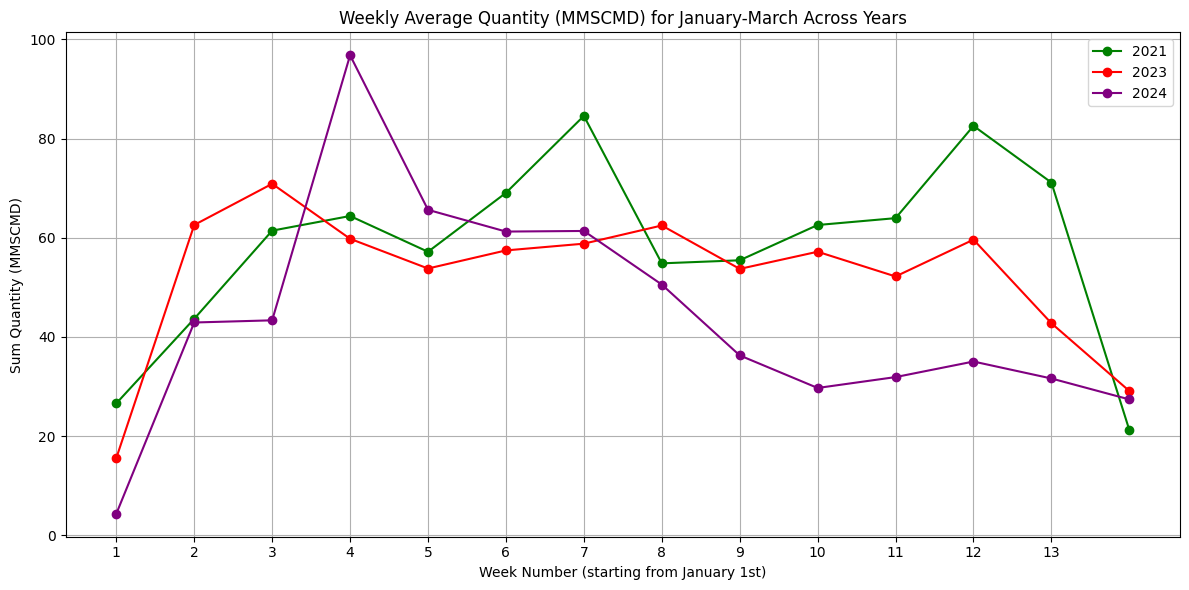

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convert 'Standardized Date' to datetime if it's not already
aggregated_df['Standardized Date'] = pd.to_datetime(aggregated_df['Standardized Date'])

# Function to filter and resample data for April-June of a specific year
def get_april_june_data_weekly(df, year):
    start_date = f'{year}-01-01'
    end_date = f'{year}-03-31'
    filtered_df = df[(df['Standardized Date'] >= start_date) & (df['Standardized Date'] <= end_date)]
    
    # Resample to weekly frequency and calculate mean
    weekly_df = filtered_df.resample('W-MON', on='Standardized Date')['Qty (MMSCMD)'].sum().reset_index()
    
    # Calculate week number starting from April 1st
    weekly_df['Week'] = (weekly_df['Standardized Date'] - pd.Timestamp(start_date)).dt.days // 7 + 1
    
    return weekly_df

# Get weekly data for each year
data_2020 = get_april_june_data_weekly(aggregated_df, 2020)
data_2021 = get_april_june_data_weekly(aggregated_df, 2021)
data_2023 = get_april_june_data_weekly(aggregated_df, 2023)
data_2024 = get_april_june_data_weekly(aggregated_df, 2024)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot data for each year
years = [2020, 2021, 2023, 2024]
colors = ['blue', 'green', 'red', 'purple']

for year, color in zip(years, colors):
    data = locals()[f'data_{year}']
    if not data.empty:
        plt.plot(data['Week'], data['Qty (MMSCMD)'], 
                 label=str(year), color=color, marker='o')

plt.title('Weekly Average Quantity (MMSCMD) for January-March Across Years')
plt.xlabel('Week Number (starting from January 1st)')
plt.ylabel('Sum Quantity (MMSCMD)')
plt.legend()
plt.grid(True)

# Set x-axis ticks to show all weeks
plt.xticks(range(1, 14))  # 13 weeks in a 3-month period

# Adjust layout to prevent cut-off labels
plt.tight_layout()

# Show the plot
plt.show()

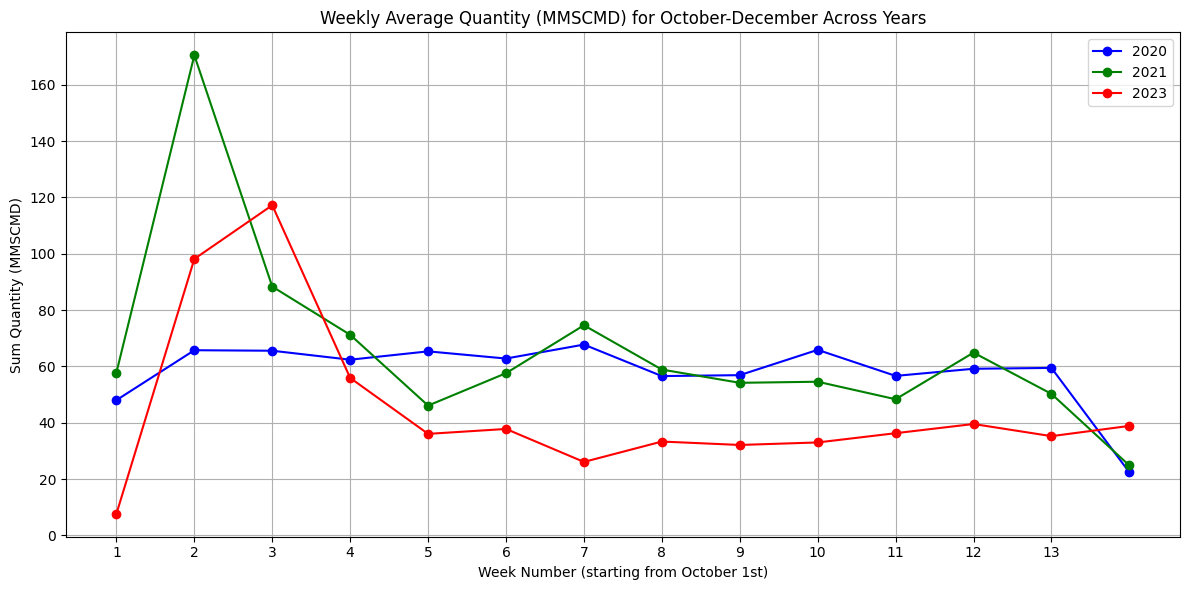

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convert 'Standardized Date' to datetime if it's not already
aggregated_df['Standardized Date'] = pd.to_datetime(aggregated_df['Standardized Date'])

# Function to filter and resample data for April-June of a specific year
def get_april_june_data_weekly(df, year):
    start_date = f'{year}-10-01'
    end_date = f'{year}-12-31'
    filtered_df = df[(df['Standardized Date'] >= start_date) & (df['Standardized Date'] <= end_date)]
    
    # Resample to weekly frequency and calculate mean
    weekly_df = filtered_df.resample('W-MON', on='Standardized Date')['Qty (MMSCMD)'].sum().reset_index()
    
    # Calculate week number starting from April 1st
    weekly_df['Week'] = (weekly_df['Standardized Date'] - pd.Timestamp(start_date)).dt.days // 7 + 1
    
    return weekly_df

# Get weekly data for each year
data_2020 = get_april_june_data_weekly(aggregated_df, 2020)
data_2021 = get_april_june_data_weekly(aggregated_df, 2021)
data_2023 = get_april_june_data_weekly(aggregated_df, 2023)
data_2024 = get_april_june_data_weekly(aggregated_df, 2024)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot data for each year
years = [2020, 2021, 2023, 2024]
colors = ['blue', 'green', 'red', 'purple']

for year, color in zip(years, colors):
    data = locals()[f'data_{year}']
    if not data.empty:
        plt.plot(data['Week'], data['Qty (MMSCMD)'], 
                 label=str(year), color=color, marker='o')

plt.title('Weekly Average Quantity (MMSCMD) for October-December Across Years')
plt.xlabel('Week Number (starting from October 1st)')
plt.ylabel('Sum Quantity (MMSCMD)')
plt.legend()
plt.grid(True)

# Set x-axis ticks to show all weeks
plt.xticks(range(1, 14))  # 13 weeks in a 3-month period

# Adjust layout to prevent cut-off labels
plt.tight_layout()

# Show the plot
plt.show()

In [151]:
df['Customer Location']

0        BHARUCH_N.T.P.C LIMITED(10333 NGSGU
1        BHARUCH_N.T.P.C LIMITED(10333 NGSGU
2        BHARUCH_N.T.P.C LIMITED(10333 NGSGU
3        BHARUCH_N.T.P.C LIMITED(10333 NGSGU
4        BHARUCH_N.T.P.C LIMITED(10333 NGSGU
                        ...                 
35386    KASHIPUR-GAMA INFRAPROP PRIVATE LTD
35387    KASHIPUR-GAMA INFRAPROP PRIVATE LTD
35388                    DELHI PPCL, BHAWANA
35389        TROMBAY TATA POWER APM TERMINAL
35390     URAN-ONGC MAH STATE POWER GEN (APM
Name: Customer Location, Length: 35391, dtype: object